In [4]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [5]:
dataset = pd.read_csv('Churn_Modelling.csv')
dataset.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [6]:
X = dataset.iloc[:, 3:13].values
X

array([[619, 'France', 'Female', ..., 1, 1, 101348.88],
       [608, 'Spain', 'Female', ..., 0, 1, 112542.58],
       [502, 'France', 'Female', ..., 1, 0, 113931.57],
       ...,
       [709, 'France', 'Female', ..., 0, 1, 42085.58],
       [772, 'Germany', 'Male', ..., 1, 0, 92888.52],
       [792, 'France', 'Female', ..., 1, 0, 38190.78]], dtype=object)

In [7]:
y = dataset.iloc[:, 13].values
y

array([1, 0, 1, ..., 1, 1, 0], dtype=int64)

In [8]:
from sklearn.preprocessing import LabelEncoder
labelencoder_X1 = LabelEncoder()
X[:,1] = labelencoder_X1.fit_transform(X[:,1])

In [9]:
X

array([[619, 0, 'Female', ..., 1, 1, 101348.88],
       [608, 2, 'Female', ..., 0, 1, 112542.58],
       [502, 0, 'Female', ..., 1, 0, 113931.57],
       ...,
       [709, 0, 'Female', ..., 0, 1, 42085.58],
       [772, 1, 'Male', ..., 1, 0, 92888.52],
       [792, 0, 'Female', ..., 1, 0, 38190.78]], dtype=object)

In [10]:
labelencoder_X2 = LabelEncoder()
X[:,2] = labelencoder_X2.fit_transform(X[:,2])

In [11]:
X

array([[619, 0, 0, ..., 1, 1, 101348.88],
       [608, 2, 0, ..., 0, 1, 112542.58],
       [502, 0, 0, ..., 1, 0, 113931.57],
       ...,
       [709, 0, 0, ..., 0, 1, 42085.58],
       [772, 1, 1, ..., 1, 0, 92888.52],
       [792, 0, 0, ..., 1, 0, 38190.78]], dtype=object)

In [12]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

transformer = ColumnTransformer(
    transformers=[
        ("Churn_Modelling",        # Un nombre de la transformación
         OneHotEncoder(categories='auto'), # La clase a la que transformar
         [1]            # Las columnas a transformar.
         )
    ], remainder='passthrough'
)

X = transformer.fit_transform(X)
X

array([[1.0, 0.0, 0.0, ..., 1, 1, 101348.88],
       [0.0, 0.0, 1.0, ..., 0, 1, 112542.58],
       [1.0, 0.0, 0.0, ..., 1, 0, 113931.57],
       ...,
       [1.0, 0.0, 0.0, ..., 0, 1, 42085.58],
       [0.0, 1.0, 0.0, ..., 1, 0, 92888.52],
       [1.0, 0.0, 0.0, ..., 1, 0, 38190.78]], dtype=object)

In [13]:
X = X[:, 1:]

In [20]:
type(X)

numpy.ndarray

In [15]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X,y, test_size = 0.2, random_state = 0)

from sklearn.preprocessing import StandardScaler
sX = StandardScaler()
X_train = sX.fit_transform(X_train)
X_test = sX.transform(X_test)

In [21]:
#construimos nuestra red neuronal
import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout

clf = Sequential()

#primera capa
clf.add(Dense(units = 6,kernel_initializer = "uniform", activation = "relu", input_dim = 11))
clf.add(Dropout(p=0.1))

#segunda capa
clf.add(Dense(units = 6,kernel_initializer = "uniform", activation = "relu"))
clf.add(Dropout(p=0.1))

#segunda capa
clf.add(Dense(units = 1,kernel_initializer = "uniform", activation = "sigmoid"))

#compilador de la RNA
clf.compile(optimizer = "adam", loss = "binary_crossentropy", metrics = ["accuracy"])

clf.fit(X_train, Y_train, batch_size = 10, epochs = 100)



Using TensorFlow backend.
C:\Users\artur\.conda\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:11: UserWarning: Update your `Dropout` call to the Keras 2 API: `Dropout(rate=0.1)`
  # This is added back by InteractiveShellApp.init_path()
C:\Users\artur\.conda\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:15: UserWarning: Update your `Dropout` call to the Keras 2 API: `Dropout(rate=0.1)`
  from ipykernel import kernelapp as app


Epoch 1/100
8000/8000 [==============================] - 1s 183us/step - loss: 0.4939 - accuracy: 0.7950
Epoch 2/100
8000/8000 [==============================] - 1s 151us/step - loss: 0.4291 - accuracy: 0.8133
Epoch 3/100
8000/8000 [==============================] - 1s 156us/step - loss: 0.4253 - accuracy: 0.8191
Epoch 4/100
8000/8000 [==============================] - 1s 164us/step - loss: 0.4220 - accuracy: 0.8207
Epoch 5/100
8000/8000 [==============================] - 1s 183us/step - loss: 0.4170 - accuracy: 0.8214
Epoch 6/100
8000/8000 [==============================] - 1s 159us/step - loss: 0.4120 - accuracy: 0.8246
Epoch 7/100
8000/8000 [==============================] - 1s 160us/step - loss: 0.4070 - accuracy: 0.8231
Epoch 8/100
8000/8000 [==============================] - 1s 158us/step - loss: 0.4093 - accuracy: 0.8221
Epoch 9/100
8000/8000 [==============================] - 1s 157us/step - loss: 0.4061 - accuracy: 0.8201
Epoch 10/100
8000/8000 [==============================]

In [22]:
%matplotlib inline
import itertools
import matplotlib.pyplot as plt

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

In [23]:
#predecir
y_pred = clf.predict(X_test)
y_pred

array([[0.2783052 ],
       [0.23257479],
       [0.13026379],
       ...,
       [0.24824134],
       [0.17281795],
       [0.22080016]], dtype=float32)

In [24]:
y_pred = (y_pred>0.5)
y_pred

array([[False],
       [False],
       [False],
       ...,
       [False],
       [False],
       [False]])

In [26]:
# Elaborar una matriz de confusión
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(Y_test, y_pred)
print((cm[0][0]+cm[1][1])/cm.sum())

0.856


Confusion matrix, without normalization
[[1539   56]
 [ 232  173]]


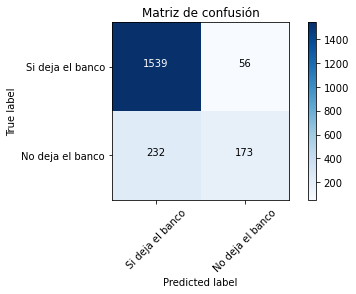

In [27]:
plot_confusion_matrix(cm, ['Si deja el banco','No deja el banco'],title='Matriz de confusión')